<a href="https://colab.research.google.com/github/caue22/TCC_Ransonware/blob/main/Algoritmos_Colab/Usando_modelo_random_forest_desbalanceado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

# Baixar arquivos públicos do Drive
!gdown "https://drive.google.com/uc?id=1-5JeNrjMOIL8jEsHJh8EqkcYsdIzouWz" -O random_forest_model_desbalanceado.pkl
!gdown "https://drive.google.com/uc?id=1hDOH0wj7icEiyXA_PiJpwdZTL-Tss7gM" -O label_encoder_desbalanceado.pkl
!gdown "https://drive.google.com/uc?id=1ifdOFYvW02ma4JXh7VkmHE5sIQSyzPu0" -O conjunto_teste_desbalanceado.csv



Downloading...
From (original): https://drive.google.com/uc?id=1-5JeNrjMOIL8jEsHJh8EqkcYsdIzouWz
From (redirected): https://drive.google.com/uc?id=1-5JeNrjMOIL8jEsHJh8EqkcYsdIzouWz&confirm=t&uuid=9fd0994b-0b6c-4108-b755-a0aac2fcfc9d
To: /content/random_forest_model_desbalanceado.pkl
100% 211M/211M [00:05<00:00, 40.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hDOH0wj7icEiyXA_PiJpwdZTL-Tss7gM
To: /content/label_encoder_desbalanceado.pkl
100% 542/542 [00:00<00:00, 3.01MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ifdOFYvW02ma4JXh7VkmHE5sIQSyzPu0
To: /content/conjunto_teste_desbalanceado.csv
100% 46.4M/46.4M [00:00<00:00, 60.6MB/s]


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.5.2 when using version 1.6.1. This might lead to breakin

Precision: 98.58%
Recall: 98.55%
F1-Score: 98.56%
AUC-ROC: 99.35%
Confusion Matrix:
[[253479   1718    145]
 [  1342  15593    163]
 [   211    542  10931]]


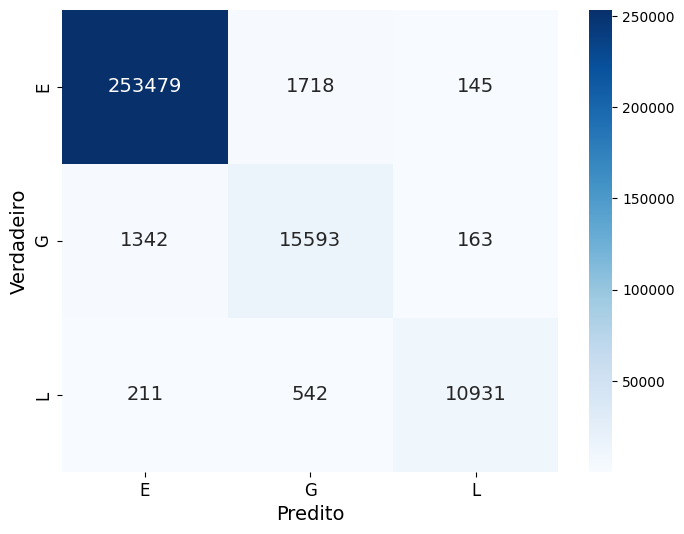

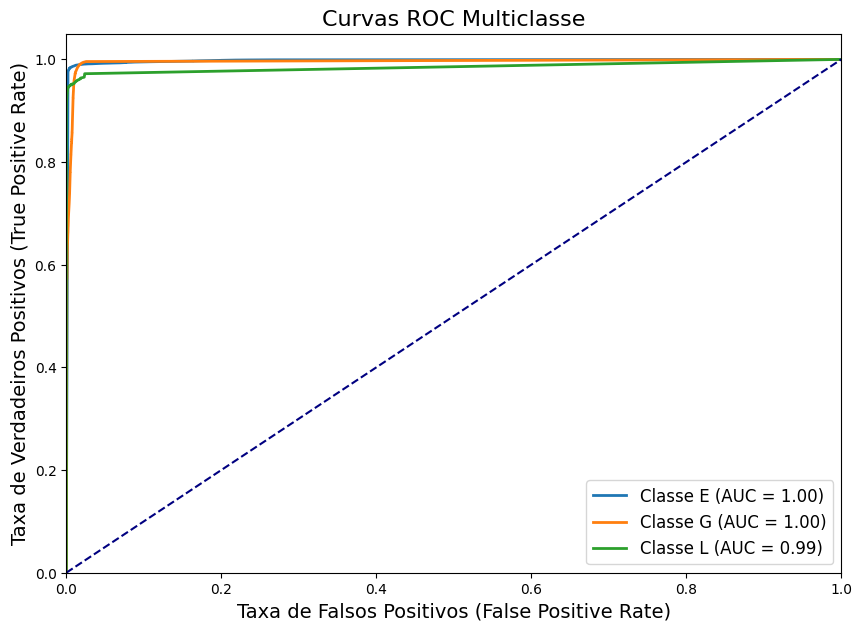

In [3]:
import pandas as pd
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns

# Caminho para o modelo salvo e o conjunto de teste
model_path = '/content/random_forest_model_desbalanceado.pkl'
label_encoder_path = '/content/label_encoder_desbalanceado.pkl'
csv_test_path = '/content/conjunto_teste_desbalanceado.csv'

# Carregar o modelo salvo
model_pipeline = joblib.load(model_path)

# Carregar o LabelEncoder salvo
label_encoder = joblib.load(label_encoder_path)

# Carregar o conjunto de teste salvo (sem a coluna 'true_label')
X_test_with_labels = pd.read_csv(csv_test_path)

# Separar a coluna 'true_label' e as características
y_test = label_encoder.transform(X_test_with_labels['true_label'])
X_test = X_test_with_labels.drop(columns=['true_label', 'index'])

# Fazer previsões com o modelo carregado
y_pred = model_pipeline.predict(X_test)

# Calcular métricas de avaliação
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC-ROC
y_pred_proba = model_pipeline.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

# Exibir os resultados
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            annot_kws={"size": 14})  # Aumentar o tamanho dos números na matriz
plt.xlabel("Predito", fontsize=14)
plt.ylabel("Verdadeiro", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Binarizar as classes para multiclasse
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Criar um dicionário para armazenar as curvas ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular a curva ROC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar todas as curvas ROC
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Classe {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})', linewidth=2)

# Plotar a linha de sorte (classificação aleatória)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)', fontsize=14)
plt.title('Curvas ROC Multiclasse', fontsize=16)
plt.legend(loc="lower right", fontsize=12)  # Aumentar o tamanho da legenda
plt.show()


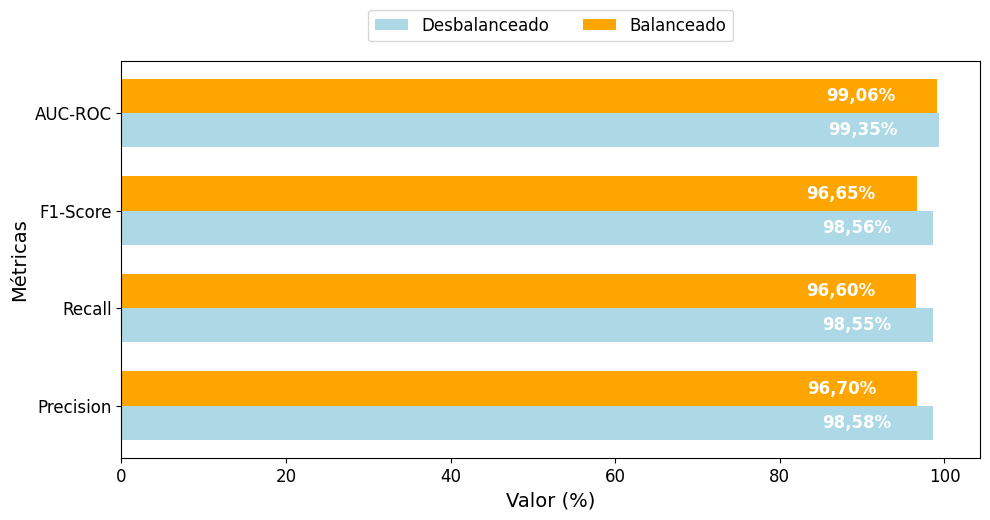

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você já tenha calculado as métricas para ambos os modelos
# Métricas do modelo desbalanceado
precision_desbalanceado = 0.9858  # substitua pelos valores reais
recall_desbalanceado = 0.9855      # substitua pelos valores reais
f1_desbalanceado = 0.9856          # substitua pelos valores reais
roc_auc_desbalanceado = 0.9935     # substitua pelos valores reais

# Métricas do modelo balanceado
precision_balanceado = 0.9670       # substitua pelos valores reais
recall_balanceado = 0.9660          # substitua pelos valores reais
f1_balanceado = 0.9665              # substitua pelos valores reais
roc_auc_balanceado = 0.9906         # substitua pelos valores reais

# Nomes das métricas
metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# Converter para porcentagem
desbalanceado = [metric * 100 for metric in [precision_desbalanceado, recall_desbalanceado, f1_desbalanceado, roc_auc_desbalanceado]]
balanceado = [metric * 100 for metric in [precision_balanceado, recall_balanceado, f1_balanceado, roc_auc_balanceado]]

# Configurar o gráfico de barras horizontais
y = np.arange(len(metrics))  # o número de grupos de métricas
width = 0.35  # a largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.barh(y - width/2, desbalanceado, width, label='Desbalanceado', color='lightblue')
bars2 = ax.barh(y + width/2, balanceado, width, label='Balanceado', color='orange')

# Adicionar título e rótulos com tamanhos de fonte maiores
ax.set_ylabel('Métricas', fontsize=14)
ax.set_xlabel('Valor (%)', fontsize=14)
ax.set_yticks(y)
ax.set_yticklabels(metrics, fontsize=12)
ax.tick_params(axis='x', labelsize=12)  # Tamanho dos rótulos do eixo x

# Mover a legenda para fora do gráfico (acima) e aumentar o tamanho da fonte
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=12, ncol=2)

# Adicionar rótulos de valor dentro das barras
def add_value_labels(bars):
    """Adiciona rótulos de valor dentro das barras, formatados com vírgula como separador decimal."""
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}'.replace('.', ',') + '%',
                    xy=(width - 5, bar.get_y() + bar.get_height() / 2),
                    ha='right', va='center', color='white', fontsize=12, weight='bold')  # Tamanho e estilo dos rótulos

add_value_labels(bars1)
add_value_labels(bars2)

# Ajustar layout para incluir a legenda fora do gráfico
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Ajustar para espaço acima
plt.show()
